In [10]:
import matplotlib.pyplot as plt
import csv
import numpy as np
from pandas import *
from mpl_toolkits.axes_grid1 import Divider, Size

# outputs from INTO-CPS cosim file
outputs = read_csv("outputs.csv")

# cosim model data
x_cosim = outputs['{model}.m.x'].tolist()
y_cosim = outputs['{model}.m.y'].tolist()
velocity_cosim = outputs['{model}.m.velocity'].tolist()
steer_angle_cosim = outputs['{model}.m.steer_angle'].tolist()

# f1tenth simulator data
x_data = outputs['{odom}.o.x_s'].tolist()
y_data = outputs['{odom}.o.y_s'].tolist()
velocity_data = outputs['{odom}.o.velocity_s'].tolist()
steer_angle_data = outputs['{odom}.o.steer_angle_s'].tolist()

# kalman filter data
x_kf = outputs['{kf}.kf.x_p'].tolist()
y_kf = outputs['{kf}.kf.y_p'].tolist()
velocity_kf = outputs['{kf}.kf.velocity_p'].tolist()
steer_angle_kf = outputs['{kf}.kf.steer_angle_p'].tolist()

#simulation time
simtime = 20
    

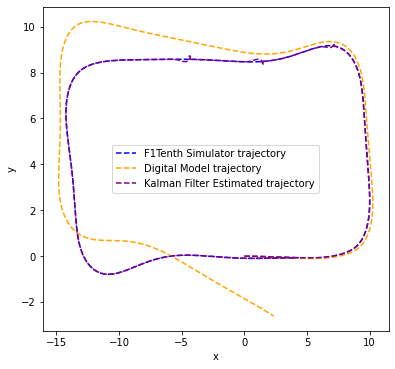

In [11]:
# plot robot trajectory
# fixing the plotsize
fig = plt.figure(figsize=(6, 6))
h = [Size.Fixed(1.0), Size.Scaled(1.), Size.Fixed(.2)]
v = [Size.Fixed(1.0), Size.Scaled(1.), Size.Fixed(.5)]

divider = Divider(fig, (0, 0, 1, 1), h, v, aspect=False)

ax = fig.add_axes(divider.get_position(),
                  axes_locator=divider.new_locator(nx=1, ny=1))

plt.plot(x_data, y_data, color='blue', linestyle='dashed', label='F1Tenth Simulator trajectory')
plt.plot(x_cosim, y_cosim, color='orange', linestyle='dashed', label='Digital Model trajectory')
plt.plot(x_kf, y_kf, color='purple', linestyle='dashed', label='Kalman Filter Estimated trajectory')
plt.xlabel('x')
plt.ylabel('y')


plt.legend()

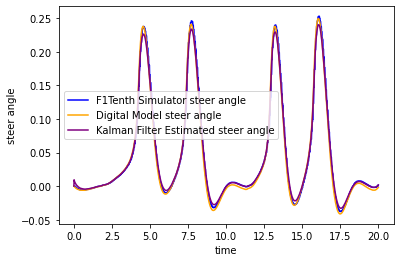

In [12]:
#plot steering angle controller performance

t = np.linspace(0, simtime, len(steer_angle_cosim))


plt.plot(t, steer_angle_data, color='blue', label='F1Tenth Simulator steer angle')
plt.plot(t, steer_angle_cosim, color='orange', label='Digital Model steer angle')
plt.plot(t, steer_angle_kf, color='purple', label='Kalman Filter Estimated steer angle')
plt.xlabel('time')
plt.ylabel('steer angle')
plt.legend()

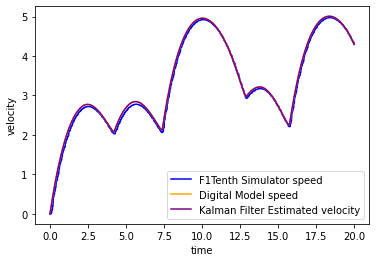

In [13]:
#plot speed controller performance
t = np.linspace(0, simtime, len(velocity_cosim))

plt.plot(t, velocity_data, color='blue', label='F1Tenth Simulator velocity')
plt.plot(t, velocity_cosim, color='orange', label='Digital Model velocity')
plt.plot(t, velocity_cosim, color='purple', label='Kalman Filter Estimated velocity')

plt.xlabel('time')
plt.ylabel('velocity')
plt.legend()